In [1]:
# Harbinger Package
# version 1.0.777

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/jupyter.R")

#loading Harbinger
load_library("daltoolbox") 
load_library("harbinger") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: harbinger



In [2]:
#Creating dataset
n <- 100  # size of each segment
serie1 <- c(sin((1:n)/pi), 2*sin((1:n)/pi), 10 + sin((1:n)/pi),
           10-10/n*(1:n)+sin((1:n)/pi)/2, sin((1:n)/pi)/2)
serie2 <- 2*c(sin((1:n)/pi), 2*sin((1:n)/pi), 10 + sin((1:n)/pi),
           10-10/n*(1:n)+sin((1:n)/pi)/2, sin((1:n)/pi)/2)
event <- rep(FALSE, length(serie1))
event[c(100, 200, 300, 400)] <- TRUE
dataset <- data.frame(serie1, serie2, event)

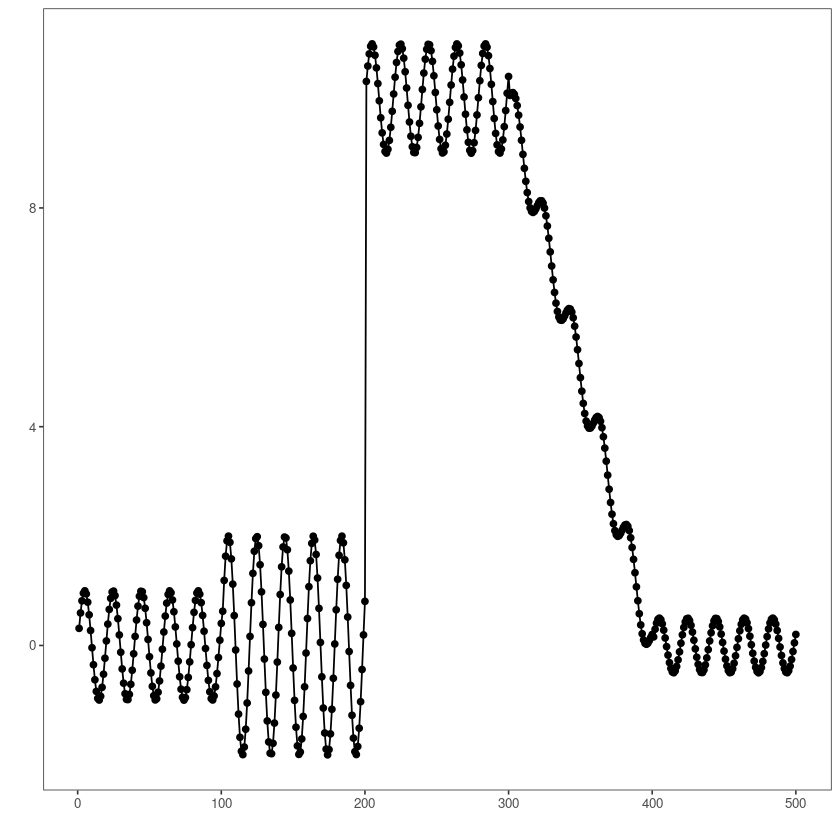

In [3]:
#ploting the time series
plot_ts(x = 1:length(dataset$serie1), y = dataset$serie1)

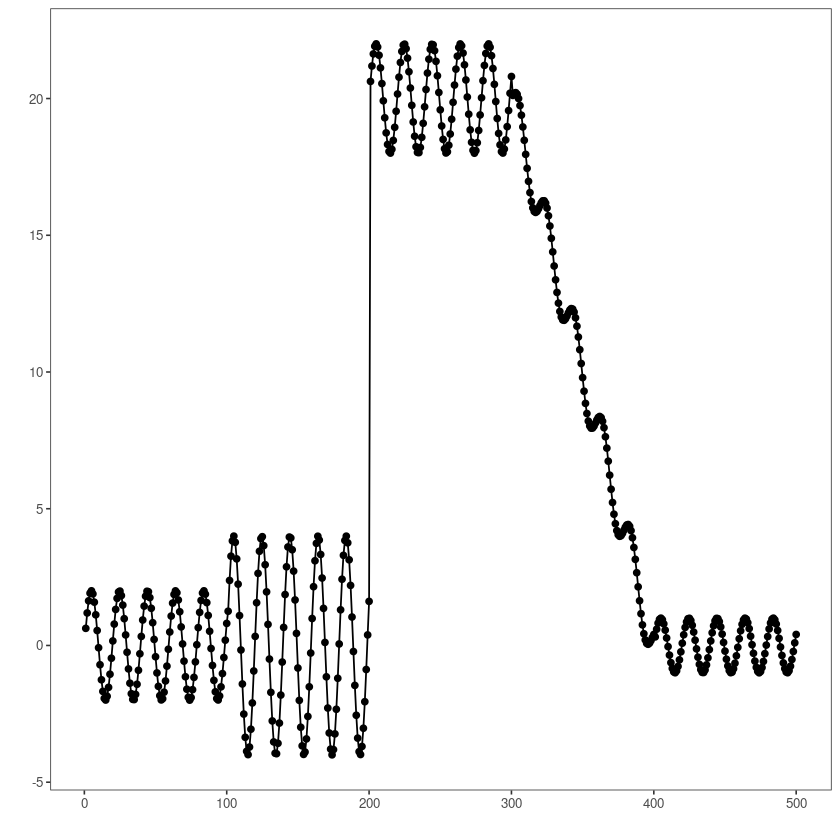

In [4]:
#ploting serie #2
plot_ts(x = 1:length(dataset$serie2), y = dataset$serie2)

In [5]:
# establishing drift method 
model <- hcd_page_hinkley(threshold=3)

In [6]:
# fitting the model
model <- fit(model, dataset)

In [7]:
# making detections
detection <- detect(model, dataset)

In [8]:
# filtering detected events
print(detection[(detection$event),])

    idx event        type
207 207  TRUE changepoint


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     1    
FALSE     4     495  


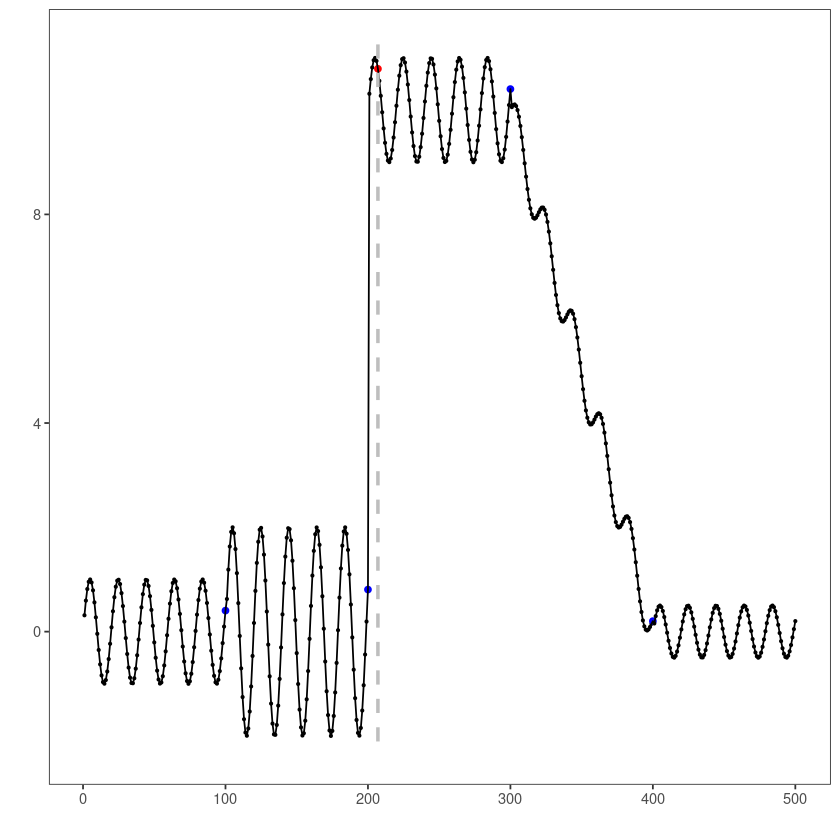

In [10]:
# ploting the results
  grf <- har_plot(model, dataset$serie1, detection, dataset$event)
  plot(grf)